# The Amazon Rainforest: Is Deforestation Increasing?

![Amazonforest.img](Images/Bernardo-Flores_Barcelos_6.jpg)

## Project Overview

The Amazon rainforest is disappearing at an alarming rate in Brazil. Each year thousands of kilometers of rainforest are destroyed from deforestation. The Amazon rainforest is the world's biggest rainforest. The Amazon rainforest offers a huge ecosystem containing about 30 percent of the world's species and sustaining life for people, animals, and plants across many Brazilian states. What happens when the developing environment in this area of the world is destroyed? What massive repercussions could there be for the world? How do many aspects of life such as the conquests of forest fires, the configurations of weather phenomena, the growth of population, and the expansion of GDP influence the deforestation of the Amazon? Will the Amazon rainforest still exist in years to come if deforestation continues? 

## Business Problem

For this project I am acting as a data scientist with an environmental conservation organization in Brazil to prevent unneccessary effects of deforestation by determining if Amazon deforestation is increasing. I intend to determine what factors influence the deforestation of the Amazon. I plan to conclude whether forest fires are correlated with deforestation, and what patterns and information lie within the occurrences of forest fires across a number of Brazilian states that may impact deforestation.

## Data Preparation

### State Inspection

I started my analyses by first reading in some libraries I used. I read in the first dataset on deforestation from The Brazilian Amazon Rainforest Monitoring Program by Satellite. I converted some of the column names to English and looked at basic stats for the dataset.

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
rawdf= pd.read_csv('Data/def_area_2004_2019.csv')
rawdf

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [185]:
rawdf.rename({
    'Ano/Estados':'Year',
    'AC':'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapa',
    'MA':'Maranhao',
    'MT':'Mato Grosso',
    'PA':'Para',
    'RO':'Rondonia',
    'RR':'Roraima',
    'TO':'Tocantins',
    'AMZ LEGAL':'Total'
}, axis=1, inplace=True)
rawdf

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [186]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
Year           16 non-null int64
Acre           16 non-null int64
Amazonas       16 non-null int64
Amapa          16 non-null int64
Maranhao       16 non-null int64
Mato Grosso    16 non-null int64
Para           16 non-null int64
Rondonia       16 non-null int64
Roraima        16 non-null int64
Tocantins      16 non-null int64
Total          16 non-null int64
dtypes: int64(11)
memory usage: 1.5 KB


In [187]:
rawdf.describe()

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2011.500000,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,4.760952,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,2004.000000,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,2007.750000,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,2011.500000,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,2015.250000,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,2019.000000,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


I created a plot of total deforested Amazonian area in Brazil by year from 2004-2019.

Text(0, 0.5, 'Deforestated Area in Km2')

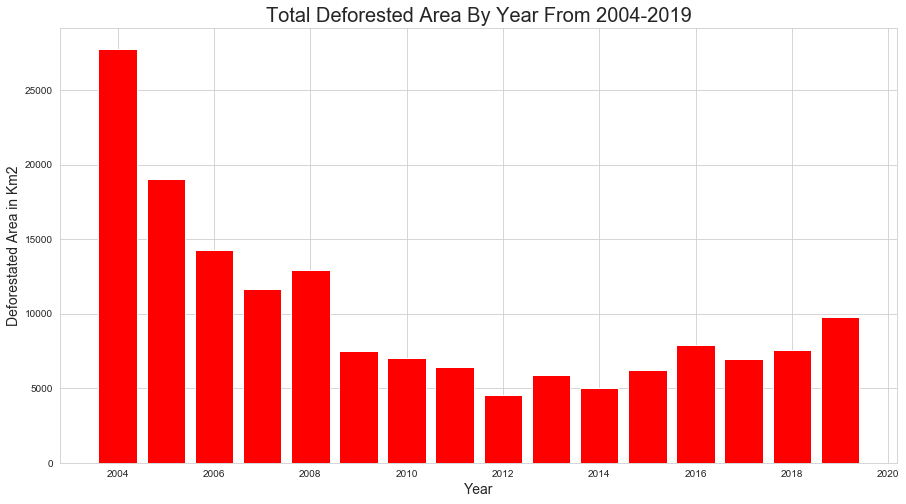

In [188]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
plt.bar(rawdf['Year'], rawdf['Total'], color='red', align= 'center')
plt.title('Total Deforested Area By Year From 2004-2019', fontsize=20)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Deforestated Area in Km2', fontsize= 14)

The year 2004 had the most deforestation out of the years between 2004 and 2019 and the year 2012 had the least deforestation out of the years between 2004 and 2019. Deforestation generally decreased from 2004-2012, but then increased from 2012-2019.

I looked at the percentage of Amazon deforestation for the year 2019. The year 2019 makes up about 6% of the entire Amazonian deforestation that happened between 2004 and 2019.

In [189]:
PercentofDeforestation2019= (rawdf['Total'][15].sum())/rawdf['Total'].sum()
PercentofDeforestation2019

0.060885021985218446

Also, I wanted to look at the Amazon deforestation totals by state in Brazil. I fixed a states dataframe and created a graph to do so.

In [190]:
states=rawdf.drop(["Year", "Total"], axis=1)
states

,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins
0,728,1232,46,755,11814,8870,3858,311,158
1,592,775,33,922,7145,5899,3244,133,271
2,398,788,30,674,4333,5659,2049,231,124
3,184,610,39,631,2678,5526,1611,309,63
4,254,604,100,1271,3258,5607,1136,574,107
5,167,405,70,828,1049,4281,482,121,61
6,259,595,53,712,871,3770,435,256,49
7,280,502,66,396,1120,3008,865,141,40
8,305,523,27,269,757,1741,773,124,52
9,221,583,23,403,1139,2346,932,170,74


Text(0, 0.5, 'Deforestated Area in Km2')

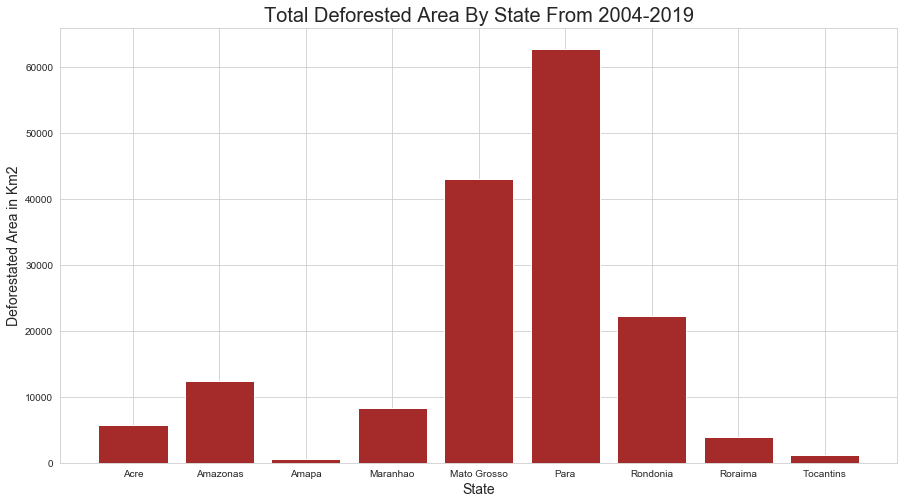

In [191]:
plt.figure(figsize=(15,8))
plt.bar(states.columns, states.sum(), color='brown', align= 'center')
plt.title('Total Deforested Area By State From 2004-2019', fontsize=20)
plt.xlabel('State', fontsize= 14)
plt.ylabel('Deforestated Area in Km2', fontsize= 14)

Para had the most deforested area out of all the Brazilian states that the Amazon is located in between the years 2004-2019. Amapa had the least deforested area out of all the Brazilian states the the Amazon is located in between the years 2004-2019. Para is one of the biggest Brazilian states the Amazon is located in and Amapa is one of the smallest Brazilian states the Amazon is located in so these observations make sense. The Brazilian state of Rondonia might have a particularly high amount of deforestation in comparison to its state size and the Brazilian state of Amazonas might have a particularly low amount of deforestation in comparison to its state size.

I created a graph that showed the yearly totals for Amazon deforestation by state and total Amazon deforestation between 2004 and 2019. Some states seemed more correlated with total deforestation over time than others.

Text(0, 0.5, 'Deforestated Area in Km2')

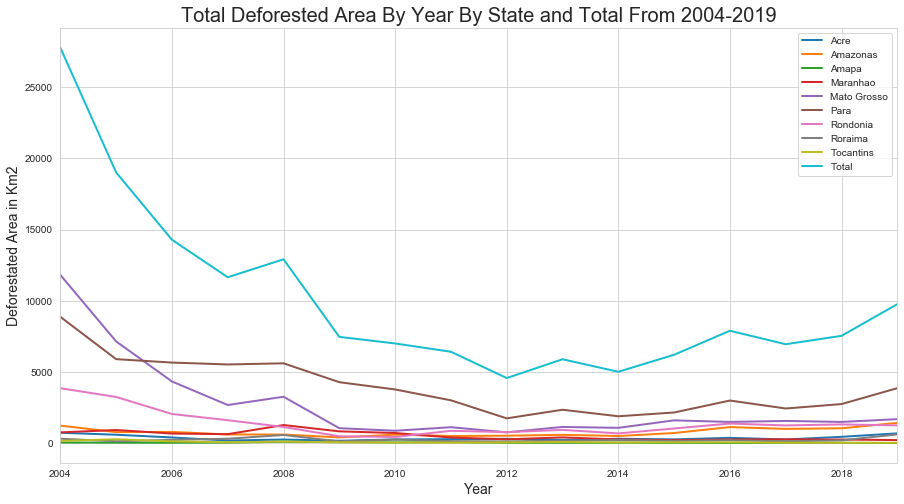

In [192]:
fig, ax = plt.subplots(figsize=(15,8))
#graph inspired from https://www.kaggle.com/sbengali/brazilian-amazon-rainforest-degradation-analysis
states1 = ['Acre', 'Amazonas', 'Amapa', 'Maranhao', 'Mato Grosso', 'Para', 'Rondonia', 'Roraima', 'Tocantins', 'Total']
rawdf.plot(x='Year', y= rawdf.columns[1:11], label=states1 , colormap='tab10', linewidth=2, ax=ax)
plt.title('Total Deforested Area By Year By State and Total From 2004-2019', fontsize=20)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Deforestated Area in Km2', fontsize= 14)

I separated the state and total deforestation trends by year between 2004-2019. The Mato Grosso, Para, Rondonia, and Tocantins deforestation plots seemed very similar to the total deforestation plot. Their trends in Amazonian deforestation were similar to total Amazonian deforestation. 2008 seemed to be a peak year for Amazon deforestation.

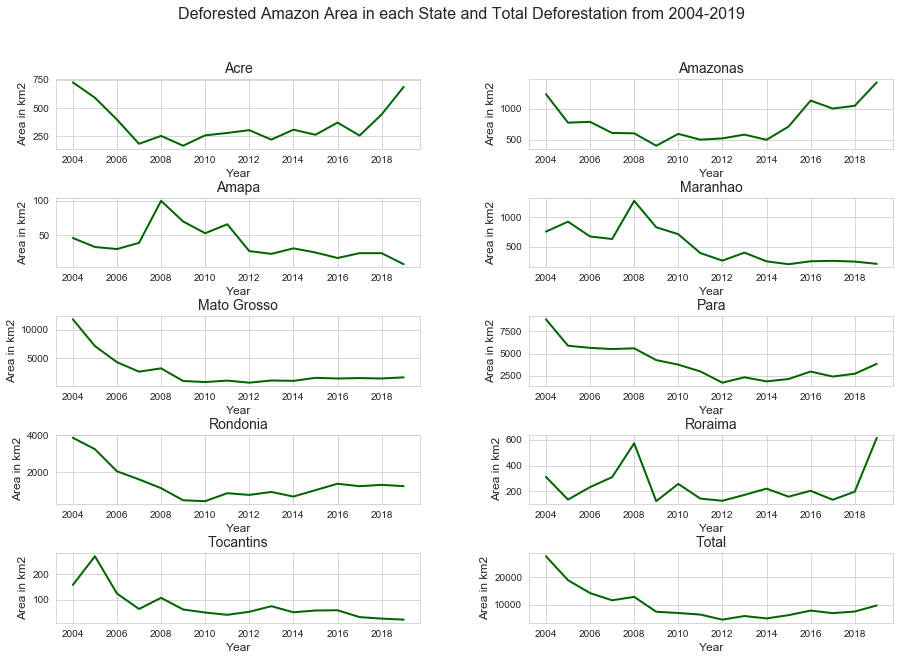

In [193]:
fig, ax = plt.subplots(5, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
plt.suptitle('Deforested Amazon Area in each State and Total Deforestation from 2004-2019', fontsize=16)
col_names = rawdf.columns[1:11]
for i in range(5):
    for j in range(2):
        #Creates subplots of the different states and total deforestation
        col = col_names[i*2+j]
        ax[i,j].plot(rawdf['Year'], rawdf[col], linewidth=2, color='darkgreen')
        ax[i,j].set_ylabel('Area in km2', fontsize=12)
        ax[i,j].set_xlabel('Year', fontsize=12)
        ax[i,j].set_title(states1[i*2+j], fontsize=14)

### Weather Inspection

I wanted to see how weather related to Amazon deforestation. I read in the weather dataset from Golden Gate Weather Services.

The data contains two types of weather phenomena that occur in Brazil and influence the weather in the Amazon: El Nino and La Nina. El Nino is particularly warm, dry weather patterns and La Nina is particularly cold, wet weather patterns.

In [194]:
weatherdf=pd.read_csv('Data/el_nino_la_nina_1999_2019.csv')
weatherdf

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate
5,2009,2010,El Nino,Moderate
6,2015,2016,El Nino,Very Strong
7,2000,2001,La Nina,Weak
8,2005,2006,La Nina,Weak
9,2008,2009,La Nina,Weak


I created a graph to show the El Nino and La Nina weather phenomenon between the years 2004 and 2019 and plotted the Amazon deforestation totals from each of the years between 2004 and 2019 to compare weather phenomena to deforestation.

In [195]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [196]:
alpha_map = {
    "Weak": .125,
    "Moderate": .25,
    "Strong": .375,
    "Very Strong": .5
}

weatherdf['alpha'] = weatherdf["severity"].map(alpha_map)

In [197]:
el_nino = weatherdf[weatherdf['phenomenon'] == 'El Nino'].copy()
la_nina= weatherdf[weatherdf['phenomenon'] == 'La Nina'].copy()

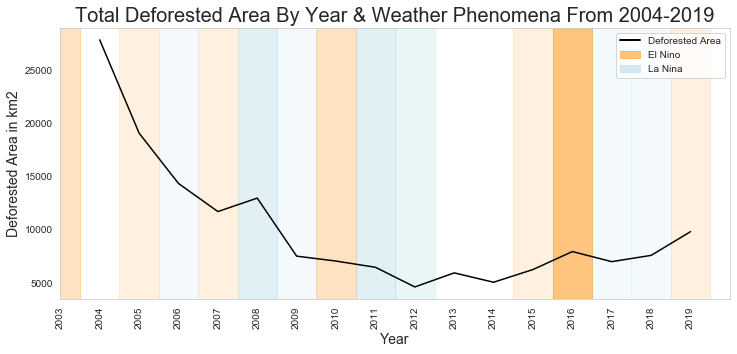

In [198]:
fig, ax = plt.subplots(figsize=(12,5))
#graph inspired from https://www.kaggle.com/mbogernetto/is-brazilian-amazon-degradation-increasing
for i, row in el_nino.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+.5, row["end year"]+.5, alpha=row["alpha"], color='darkorange', label='El Nino')

for i, row in la_nina.iterrows(): #generate a list of rows
    ax.axvspan(row["start year"]+.5, row["end year"]+.5, alpha=row["alpha"], color='lightblue', label='La Nina')

sns.lineplot(x=rawdf['Year'], y=rawdf['Total'], estimator='sum', color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(2003, 2020)), rotation=90)
ax.set_xlim(2003, 2020)

plt.title("Total Deforested Area By Year & Weather Phenomena From 2004-2019", fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Deforested Area in km2', fontsize=14)

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Deforested Area'),
                   Patch(facecolor='darkorange', edgecolor='darkorange', label='El Nino', alpha=.5),
                   Patch(facecolor='lightblue', edgecolor='lightblue', label='La Nina', alpha=.5)]

ax.legend(handles=legend_elements);

Weather phenomena did not seem to have a major impact on kilometers of deforestation per year. The years 2015, 2016, and 2019 were years that had slight relation to deforestation where the warm, dry weather of El Nino correlated with higher amounts of deforestation of the Amazon. The years 2011 and 2012 were years that had slight relation to deforestation where the cold, wet weather of La Nina correlated with lower amounts of deforestation of the Amazon. Overall, there was a lack of a strong relationship between weather phenomena and Amazonian deforestation, which suggests more human causes of deforestation than natural causes.

### Fire Inspection

The third dataset I worked with came from The Fires Database at The National Institute for Space Research. I implemented this dataset to investigate the relationship between forest fires and deforestation of the Amazon. I read in the dataset and reviewed some basic statistics of the data to start my examination.

In [199]:
firedf= pd.read_csv('Data/inpe_brazilian_amazon_fires_1999_2019.csv')
firedf

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [200]:
firedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
year         2104 non-null int64
month        2104 non-null int64
state        2104 non-null object
latitude     2104 non-null float64
longitude    2104 non-null float64
firespots    2104 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [201]:
firedf.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


I created a heatmap to show the prevalence of firespots in each state between the years 1999-2019.

Text(0.5, 1, 'FireSpots in Each State From 1999 to 2019')

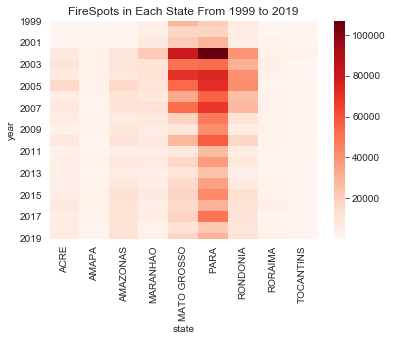

In [202]:
statefires = pd.pivot_table(firedf, values='firespots',index=['year'], columns=['state'], 
                     aggfunc=sum, fill_value=0)
sns.heatmap(statefires, cmap= 'Reds')
plt.title('FireSpots in Each State From 1999 to 2019')

The Brazilian state of Para had the strongest amount of incidences of fire outbreaks in 2002. The Brazilian state of Mato Grosso had a lot of fire outbreaks as well. Most of the high numbers of firespots occurred between the years 2002 and 2007. Para consistently had a lot of fires.

I created a yearly fires dataframe to plot fire outbreaks per year across all the Brazilian Amazon states.

In [203]:
yearlyfiredf=firedf.drop(["month","state","latitude","longitude"],axis=1)
yearlyfiredf

,year,firespots
0,1999,3
1,1999,36
2,1999,18
3,1999,87
4,1999,1
...,...,...
2099,2019,148
2100,2019,1280
2101,2019,42
2102,2019,27


I plotted the total number of fire outbreaks across all Brazilian Amazon states for the years between 1999-2019 below.

Text(0.5, 1.0, 'Total Fire Outbreaks Determined Per Year')

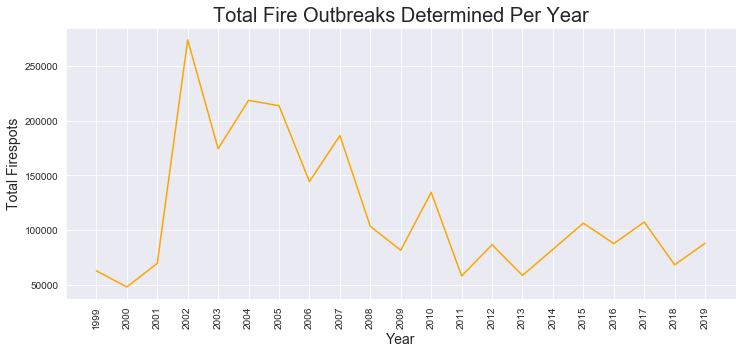

In [204]:
plt.figure(figsize=(12,5))
fireyear = list(range(1999, 2020))
sns.set_style("darkgrid")
sns.lineplot(data=yearlyfiredf, x='year', y='firespots', ci= None, estimator='sum', color="orange")
plt.ylabel("Total Firespots", fontsize= 14)
plt.xlabel("Year", fontsize= 14)
plt.xticks(fireyear, rotation=90)
plt.title("Total Fire Outbreaks Determined Per Year", fontsize= 20)

The year 2002 had the most fires and the year 2000 had the least fires. Firespots have predominantly declined since 2002, but from around 2013-2017 there was an increase in the amount of firespots compared to past years. There are similar patterns to deforestation from 2004-2019.

### Population, GDP, and Additional Correlation Inspection

I constructed a dataframe of population totals across Brazil for the years 2004 to 2019 using data from macrotrends.net to compare population to Amazon deforestation.

In [205]:
p= {'Year': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'Population': [184006481, 186127103, 188167356, 190130443, 192030362, 193886508, 195713635, 197514536, 199287299, 201035912, 202763739, 204471769, 206163053, 207833823, 209469323, 211049527]}
popdf=pd.DataFrame(data=p)
popdf

,Year,Population
0,2004,184006481
1,2005,186127103
2,2006,188167356
3,2007,190130443
4,2008,192030362
5,2009,193886508
6,2010,195713635
7,2011,197514536
8,2012,199287299
9,2013,201035912


I crafted a graph of yearly population totals in Brazil from 2004-2019.

Text(0.5, 1.0, 'Total Population Per Year')

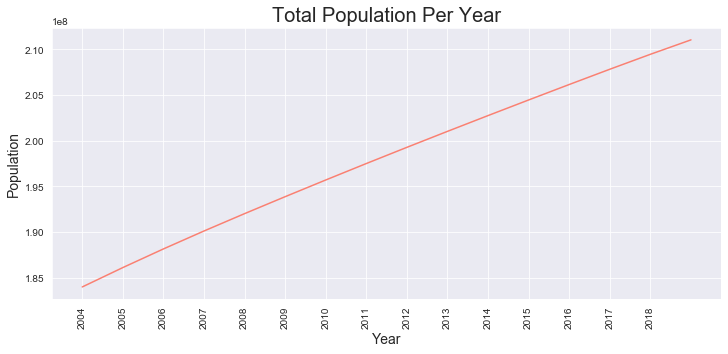

In [206]:
plt.figure(figsize=(12,5))
popyears = list(range(2004, 2019))
sns.set_style("darkgrid")
sns.lineplot(data=popdf, x='Year', y='Population', ci= None, color="salmon")
plt.ylabel("Population", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(popyears, rotation=90)
plt.title("Total Population Per Year", fontsize=20)

Population seemed to have a steady, consistent growth trend regardless of outside factors. The population in 2004 is much lower than the population in 2019.

I produced a dataframe of GDP per capita(US$) for Brazil for the years 2004-2019 to compare GDP amounts to Amazon deforestation totals.

In [207]:
d= {'Year': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'GDP per capita(US$)':[3637.462, 4790.437, 5886.464, 7348.031, 8831.023, 8597.915, 11286.243, 13245.612, 12370.024, 12300.325, 12112.588, 8814.001, 8710.097, 9925.386, 9001.234, 8717.186] }
gdpdf= pd.DataFrame(data=d)
gdpdf

,Year,GDP per capita(US$)
0,2004,3637.462
1,2005,4790.437
2,2006,5886.464
3,2007,7348.031
4,2008,8831.023
5,2009,8597.915
6,2010,11286.243
7,2011,13245.612
8,2012,12370.024
9,2013,12300.325


I generated a graph of GDP per capita(US$) for each year between the years 2004-2019.

Text(0.5, 1.0, 'Total GDP Per Year')

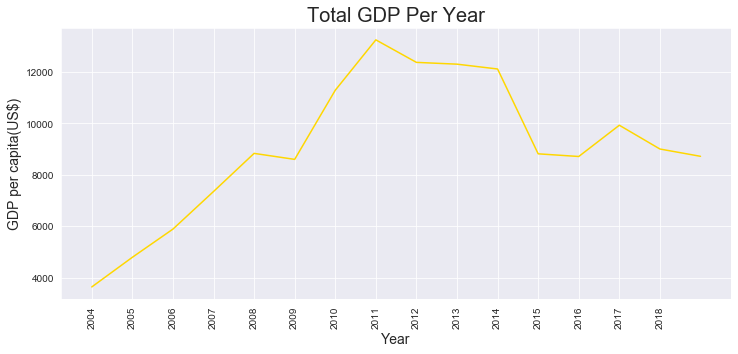

In [208]:
plt.figure(figsize=(12,5))
gdpyears = list(range(2004, 2019))
sns.set_style("darkgrid")
sns.lineplot(data=gdpdf, x='Year', y='GDP per capita(US$)', ci= None, color="gold")
plt.ylabel("GDP per capita(US$)", fontsize= 14)
plt.xlabel("Year", fontsize=14)
plt.xticks(gdpyears, rotation=90)
plt.title("Total GDP Per Year", fontsize=20)

GDP was highest for the year 2011 and lowest for the year 2004. GDP increased steadily between 2009-2011 and decreased from the year 2011-2016. There was a general upward trend to GDP.

I merged some of my dataframes with my initial deforestation dataset to more easily compare Amazon deforestation totals across different states, fire outbreaks, population, and GDP. I only included the years 2004-2019.

In [209]:
merge1=pd.merge(rawdf, popdf, on= 'Year')
merge1

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total,Population
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772,184006481
1,2005,592,775,33,922,7145,5899,3244,133,271,19014,186127103
2,2006,398,788,30,674,4333,5659,2049,231,124,14286,188167356
3,2007,184,610,39,631,2678,5526,1611,309,63,11651,190130443
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911,192030362
5,2009,167,405,70,828,1049,4281,482,121,61,7464,193886508
6,2010,259,595,53,712,871,3770,435,256,49,7000,195713635
7,2011,280,502,66,396,1120,3008,865,141,40,6418,197514536
8,2012,305,523,27,269,757,1741,773,124,52,4571,199287299
9,2013,221,583,23,403,1139,2346,932,170,74,5891,201035912


In [210]:
merge2=pd.merge(merge1, gdpdf, on= 'Year')
merge2

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total,Population,GDP per capita(US$)
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772,184006481,3637.462
1,2005,592,775,33,922,7145,5899,3244,133,271,19014,186127103,4790.437
2,2006,398,788,30,674,4333,5659,2049,231,124,14286,188167356,5886.464
3,2007,184,610,39,631,2678,5526,1611,309,63,11651,190130443,7348.031
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911,192030362,8831.023
5,2009,167,405,70,828,1049,4281,482,121,61,7464,193886508,8597.915
6,2010,259,595,53,712,871,3770,435,256,49,7000,195713635,11286.243
7,2011,280,502,66,396,1120,3008,865,141,40,6418,197514536,13245.612
8,2012,305,523,27,269,757,1741,773,124,52,4571,199287299,12370.024
9,2013,221,583,23,403,1139,2346,932,170,74,5891,201035912,12300.325


I made a function to calculate the total firespots for each unique year in the yearly fire dataset. Then I put the values into a dataframe containing the years from 2004-2019 and included the total number of firespots for each unique year.

In [211]:
for year in yearlyfiredf['year'].unique():
    #Calculates total firespots for each year in the yearly fires dataset
    print(year)
    print(yearlyfiredf[yearlyfiredf['year']==year]['firespots'].sum())

1999
62858
2000
48168
2001
69675
2002
273873
2003
174400
2004
218637
2005
213720
2006
144422
2007
186480
2008
103453
2009
81682
2010
134614
2011
58186
2012
86719
2013
58688
2014
82554
2015
106438
2016
87761
2017
107439
2018
68345
2019
88135


In [212]:
f={'Year':[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 'firespots':[218637, 213720, 144422, 186480, 103453, 81682, 134614, 58186, 86719, 58688, 82554, 106438, 87761, 107439, 68345, 88135]}
firespotsdf= pd.DataFrame(data= f)
firespotsdf

,Year,firespots
0,2004,218637
1,2005,213720
2,2006,144422
3,2007,186480
4,2008,103453
5,2009,81682
6,2010,134614
7,2011,58186
8,2012,86719
9,2013,58688


I merged the firespots dataframe I just built out with the other dataframes I merged before to get the initial deforestation dataset with population, firespots, and GDP per capita(US$) included as columns. I did these merges to more easily examine the relationships among different features that could influence Amazon deforestation totals.

In [213]:
merge3=pd.merge(merge2, firespotsdf, on= 'Year')
merge3

,Year,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total,Population,GDP per capita(US$),firespots
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772,184006481,3637.462,218637
1,2005,592,775,33,922,7145,5899,3244,133,271,19014,186127103,4790.437,213720
2,2006,398,788,30,674,4333,5659,2049,231,124,14286,188167356,5886.464,144422
3,2007,184,610,39,631,2678,5526,1611,309,63,11651,190130443,7348.031,186480
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911,192030362,8831.023,103453
5,2009,167,405,70,828,1049,4281,482,121,61,7464,193886508,8597.915,81682
6,2010,259,595,53,712,871,3770,435,256,49,7000,195713635,11286.243,134614
7,2011,280,502,66,396,1120,3008,865,141,40,6418,197514536,13245.612,58186
8,2012,305,523,27,269,757,1741,773,124,52,4571,199287299,12370.024,86719
9,2013,221,583,23,403,1139,2346,932,170,74,5891,201035912,12300.325,58688


I established a dataset to explore the correlation between total deforestation and each Amazonian state deforestation totals, firespots, population, and GDP per capita(US$).

In [214]:
correlatecols = [c for c in merge3.columns.to_list() if c not in ['Year']]

In [215]:
merge3[correlatecols].corr()

,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total,Population,GDP per capita(US$),firespots
Acre,1.000000,0.775866,-0.339829,-0.010346,0.683814,0.504576,0.735137,0.355792,0.437920,0.680878,-0.100513,-0.589384,0.443660
Amazonas,0.775866,1.000000,-0.515584,-0.275769,0.384845,0.270740,0.494205,0.411181,0.014299,0.412682,0.308319,-0.481485,0.207353
Amapa,-0.339829,-0.515584,1.000000,0.776842,0.102960,0.362181,-0.112198,0.202645,0.151954,0.163222,-0.520491,0.026654,0.039982
Maranhao,-0.010346,-0.275769,0.776842,1.000000,0.473415,0.717961,0.328803,0.297728,0.622936,0.561771,-0.793987,-0.457321,0.500669
Mato Grosso,0.683814,0.384845,0.102960,0.473415,1.000000,0.874059,0.951961,0.145706,0.768981,0.980933,-0.685199,-0.817482,0.816705
Para,0.504576,0.270740,0.362181,0.717961,0.874059,1.000000,0.788527,0.369552,0.664631,0.942646,-0.796101,-0.831159,0.805791
Rondonia,0.735137,0.494205,-0.112198,0.328803,0.951961,0.788527,1.000000,0.074951,0.784959,0.934940,-0.573035,-0.848464,0.814925
Roraima,0.355792,0.411181,0.202645,0.297728,0.145706,0.369552,0.074951,1.000000,-0.063089,0.269753,0.018148,-0.204670,0.085596
Tocantins,0.437920,0.014299,0.151954,0.622936,0.768981,0.664631,0.784959,-0.063089,1.000000,0.757374,-0.747489,-0.681220,0.742040
Total,0.680878,0.412682,0.163222,0.561771,0.980933,0.942646,0.934940,0.269753,0.757374,1.000000,-0.709597,-0.864801,0.833778


I pulled out the correlation perentages between total deforestation and the various features and graphed them with the next few code cells.

In [216]:
corrgraph=merge3[correlatecols].corr()
corrgraph['Total'].sort_values()

GDP per capita(US$)   -0.864801
Population            -0.709597
Amapa                  0.163222
Roraima                0.269753
Amazonas               0.412682
Maranhao               0.561771
Acre                   0.680878
Tocantins              0.757374
firespots              0.833778
Rondonia               0.934940
Para                   0.942646
Mato Grosso            0.980933
Total                  1.000000
Name: Total, dtype: float64

Text(0, 0.5, 'Percent')

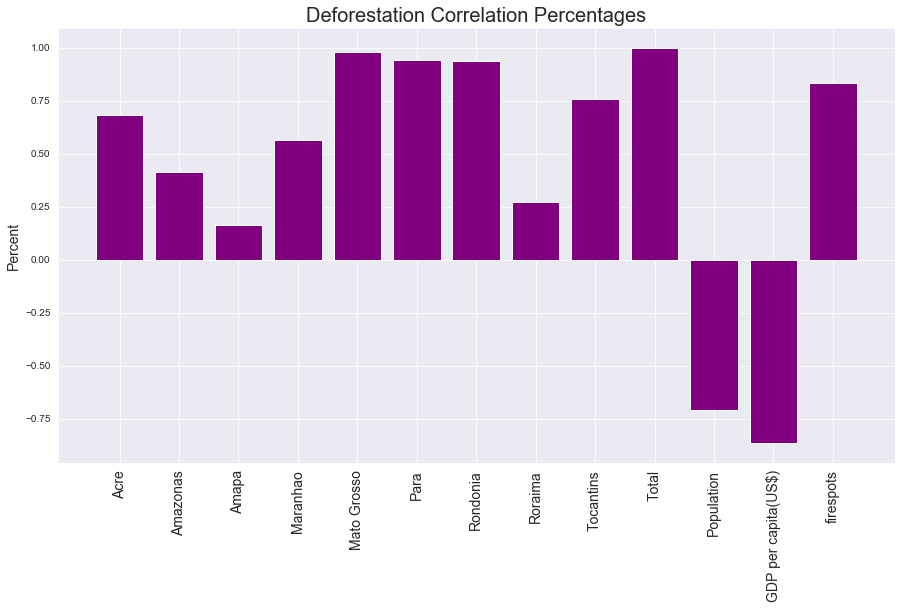

In [217]:
plt.figure(figsize=(15,8))
plt.bar(corrgraph.columns, corrgraph['Total'], color='purple', align= 'center')
plt.title('Deforestation Correlation Percentages', fontsize=20)
plt.xticks(rotation= 90, fontsize= 14)
plt.ylabel('Percent', fontsize= 14)

The deforestation amounts for the Brazilian states of Mato Grosso, Para, and Rondonia were the most correlated with total Amazon deforestation amounts across all states.  These states are fairly large states so holding high correlation percentages with total Amazonian deforestation is not unusual. Firespots were about 83% correlated with the total Amazon deforestation suggesting a strong relationship between fire outbreaks and Amazonian deforestation. Fire outbreaks may lead to deforestation. Population and GDP per capita(US dollars) had strong inverse correlations with total deforestation. Population was about 71% inversely correlated with total Amazon deforestation and GDP per capita(US dollars) was about 86% inversely correlated with total Amazon deforestation. Population decreasing with more Amazon deforestation sadly makes sense. GDP per capita(US dollars) decreasing with increasing deforestation of the Amazon could be concerning.

## Data Modeling

### Baseline Amazon Deforestation Linear Regression Analysis

The first model I designed was a baseline linear regression model to predict how population, GDP per capita(US dollars), and firespots related to Amazon deforestation totals. I used population, GDP per capita(US dollars), and firespots as my features and engineered a train test split.

In [218]:
colsformodel = [c for c in merge3.columns.to_list() if c in ['Population','GDP per capita(US$)','firespots' ]]
colsformodel

['Population', 'GDP per capita(US$)', 'firespots']

In [219]:
X= merge3[colsformodel]
y= merge3['Total']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [220]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [221]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [222]:
lr= LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [223]:
train_preds= lr.predict(X_train_scaled)
test_preds= lr.predict(X_test_scaled)

In [224]:
r2_score(y_train, train_preds)

0.8600090384548267

In [225]:
r2_score(y_test, test_preds)

0.4421258611460134

In [226]:
dict(zip(X.columns, lr.coef_))

{'Population': -1558.8396708864086,
 'GDP per capita(US$)': -2820.806724410068,
 'firespots': -998.6960105368757}

In [227]:
print(f"RMSE train: {np.sqrt(mean_squared_error(y_train, train_preds))}")

RMSE train: 1145.5896754079492


In [228]:
print(f"RMSE test: {np.sqrt(mean_squared_error(y_test, test_preds))}")

RMSE test: 6370.020408634194


My model predicted population, GDP per capita(US dollars), and firespots all as having an inverse relationship with my target variable of total deforestation. That means that population, GDP per capita(US dollars), and firespots all decrease with more deforestation. This result was different than my correlation plot with regard to firespots.

My model was very overfit with an 86% r2 score for my training data and a 44% r2 score for my testing data. This is probably due to the small amount of data fed into my model influencing a tight fitting to few individual data points. Because of the r2 scores, I do not necessarily trust the inverse relationship this model projected between firespots and deforestation. I plan to look at firespots in more detail in future models because they do seem positively correlated with deforestation. The Root Mean Squared Error or RMSE amounts of my training and testing data suggest my model could be off a small amount. This is my baseline model.

### Further Forest Fires Investigation and Modeling

Because firespots showed a correlation with Amazon deforestation of 83% in my correlation plot, I decided to do more firespots anaylsis in my next models regarding the 83% statistic as truth that more firespots have a strong chance of leading to greater deforestation.

#### States With Forest Fires By Month Plots

I started further investigating forest fires by creating subplots representing total forest fires by month and by Brazilian state to see how fires behave on the month and state basis.

In [229]:
states_piv = pd.pivot_table(firedf, values='firespots', index=['month'], columns= ['state'], aggfunc=sum, fill_value=0) 
states_list = ['ACRE', 'AMAZONAS', 'AMAPA', 'MARANHAO', 'MATO GROSSO', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS']                      

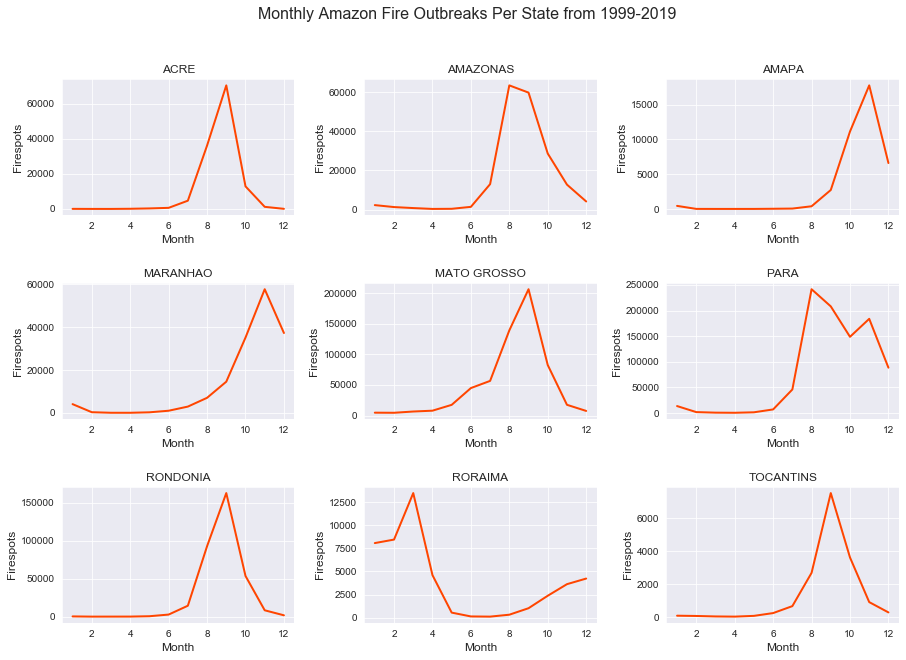

In [230]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle('Monthly Amazon Fire Outbreaks Per State from 1999-2019', fontsize=16)
for i in range(3):
    for j in range(3):
        #Creates subplots of the different states and total monthly firespots amounts
        col = states_list[i*3+j]
        piv_plot = states_piv[[col]]
        ax[i,j].plot(piv_plot.index, piv_plot[col], linewidth=2, color='orangered')
        ax[i,j].set_ylabel('Firespots', fontsize=12)
        ax[i,j].set_xlabel('Month', fontsize=12)
        ax[i,j].set_title(states_list[i*3+j])

My fire outbreak subplots determined a seasonal trend of a lot a forest fire outbreaks from June to about November. August to October is the prime season for human made fires where land is set fire to by a slash and burn technique to produce land for cattle grazing and subsistence farming (found at https://www.nytimes.com/2020/06/06/world/americas/amazon-deforestation-brazil.html). These graphs include and follow that seasonal trend fairly closely.

#### Fire Outbreaks Total by Month and Year

Fire outbreaks seemed to have a predominant decline in volume between the years 1999-2019, but there were years with a higher number of firespots than previous years that I noticed in my analyses that could negatively impact deforestation totals over time. 

I created a function that formulates a dataframe with the number of firespots per month for a given year in a dataset and includes the minimum, maximum, and mean number of firespots per month for each of the previous years in the dataset combined to analyze how one given year of monthly firespot totals compares to other previous years of monthly firespots across all states.

In [231]:
def previous_year(ds, year):
    '''Creates dataframe for number of firespots by month'''
    #function inspired from https://www.kaggle.com/mbogernetto/is-brazilian-amazon-degradation-increasing
    #Calcutes Minimum, maximum, and mean for firespots for all previous years combined excluding reference year
    df_grouped = (
        ds[ds['year'] < year].groupby(['year','month'])
        .sum()
        .groupby('month')
        .aggregate([min, max, np.mean])
    )['firespots']
    #Computes Number of firespots for reference year by month
    df_grouped[f'{year}'] = ds[ds['year'] == year].groupby('month')['firespots'].sum()

    
    return df_grouped

I tested my function on the year 2004 in an attempt to understand how 2004 compares to previous years in terms of firespot totals in the dataset.

In [232]:
stats_2004= previous_year(firedf, 2004)
stats_2004

,min,max,mean,2004
month,,,,
1,87,3704,941.2,2178
2,182,1573,695.8,805
3,130,1997,913.4,1035
4,70,1038,444.4,1012
5,449,1983,1153.6,3131
6,1439,6848,4285.4,9179
7,1510,15918,7004.8,19179
8,12791,73680,32088.0,43320
9,10062,79518,33800.6,71522


I built out a function to plot my functionally formed dataframe(stats_2004) to visualize the values and trends of firespots for a given year in comparison to previous years.

In [233]:
def plot_year_row(dataset, year):  
    '''Creates graph of firespots by month'''
    #function inspired from https://www.kaggle.com/mbogernetto/is-brazilian-amazon-degradation-increasing
    #Creates bar graph of number of firespots per month for reference year
    plt.bar(dataset.index, dataset[f'{year}'], align='center', color='brown', alpha=1, label=f"{year}", linewidth=1)
    #Creates line plots of minimum, maximum, and mean number of firespots by month excluding reference year
    sns.lineplot(data=dataset, x=dataset.index, y='min', color="yellow", lw=4, alpha=0.7, label="Minimum")
    sns.lineplot(data=dataset, x=dataset.index, y='mean', color="orange", lw=4, alpha=0.7, label="Average")
    sns.lineplot(data=dataset, x=dataset.index, y='max', color="red", lw=4, alpha=0.7, label="Maximum")
    plt.ylabel("Fire Outbreaks", size='12')
    plt.xlabel("Month", size= '12')
    plt.title(f"{year} vs Previous Years Total", size='16')

I used the plot_year_row function to plot and analyze the function formed dataframe with my test year of 2004.

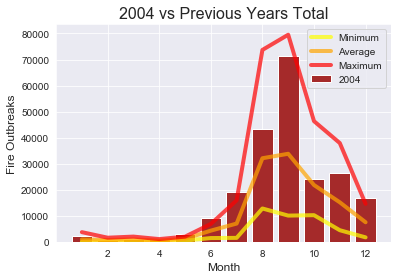

In [234]:
plot_year_row(stats_2004, 2004)

The graph above shows that the year 2004 had some points of unusually high numbers of firespots where the number of firespots in some months was higher than the maximum number of firespots for those months in previous years in the dataset.  May, June, July, and December were months with firespots that reached above maximum levels of firespots. A lot of months for the year 2004 had firespot totals that were above average in general. The year 2004 was a high fire outbreak year.

I tested my dataframe function on the year 2019 because I have been using that more current year to do a lot of modeling analyses and comprehend firespots correlations between that year and previous years. I desired to know how 2019 compared to previous years in terms of firespot totals from the dataset to better understand if deforestation is increasing over time with relation to firespots.

In [235]:
stats_2019= previous_year(firedf, 2019)
stats_2019

,min,max,mean,2019
month,,,,
1,87,4657,1624.30,1419
2,182,1761,771.45,1368
3,130,2024,933.20,3383
4,70,1075,611.40,1702
5,383,3131,1023.85,854
6,1023,9179,2825.40,1880
7,1510,19364,6670.10,5318
8,8002,73680,27651.70,30900
9,10062,79518,35685.15,19925


I used the plot_year_row function to plot and analyze the function formed dataframe(stats2019) with the test year of 2019.

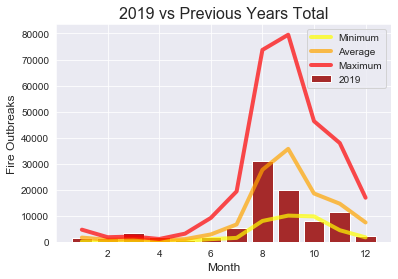

In [236]:
plot_year_row(stats_2019, 2019)

The year 2019 generally had a lower than average number of firespots compared to total firespot averages for previous years between 1999-2019. However, the months of March and April had a number of firespots in 2019 that was higher than the maximum number of firespots for those months in previous years. This is concerning data. The high number of firespots in March and April of 2019 suggests there are still times when firespot totals are reaching dangerously high levels. The numbers could be significantly problematic when related to the deforestation of the Amazon in Brazil for the future.

#### Creating a Datetime for State Time Series

I added a 'date' column to my firedf dataframe to represent the month and year together for individual state time series modeling purposes. I want to view the number of firespots for each state with a monthly and yearly time series cadence. I intend to predict the number of firespots for each Brazilian state containing the Amazon forest for each month in the year 2019 to understand how firespots are changing and might affect deforestation.

In [237]:
yearmonthcols= ['year', 'month']
firedf['date']=pd.to_datetime(firedf[yearmonthcols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns"))

In [238]:
firedf

,year,month,state,latitude,longitude,firespots,date
0,1999,1,AMAZONAS,-2.371113,-59.899933,3,1999-01-01
1,1999,1,MARANHAO,-2.257395,-45.487831,36,1999-01-01
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18,1999-01-01
3,1999,1,PARA,-2.474820,-48.546967,87,1999-01-01
4,1999,1,RONDONIA,-12.861700,-60.513100,1,1999-01-01
...,...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148,2019-12-01
2100,2019,12,PARA,-2.976727,-50.909316,1280,2019-12-01
2101,2019,12,RONDONIA,-10.809262,-62.890452,42,2019-12-01
2102,2019,12,RORAIMA,2.856667,-60.431963,27,2019-12-01


In [239]:
firedf.set_index('date')['firespots']

date
1999-01-01       3
1999-01-01      36
1999-01-01      18
1999-01-01      87
1999-01-01       1
              ... 
2019-12-01     148
2019-12-01    1280
2019-12-01      42
2019-12-01      27
2019-12-01      21
Name: firespots, Length: 2104, dtype: int64

#### Amazonas Time Series Exploration

I procured an Amazonas state time series in the next few cells.

In [240]:
Amazonasts=firedf.loc[firedf['state']=='AMAZONAS']

In [241]:
Amazonasts=Amazonasts.set_index('date')['firespots']

I plotted my Amazonas time series to show fire outbreaks per year for the Brazilian state of Amazonas between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Amazonas')

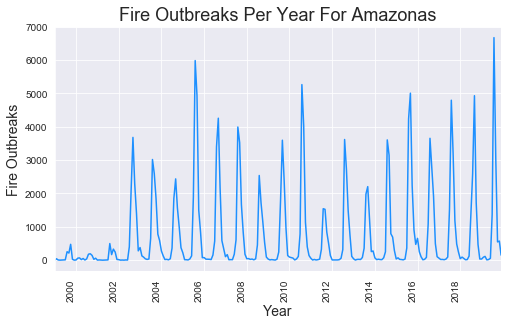

In [242]:
Amazonasts.plot(color='dodgerblue', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Amazonas", fontsize= 18)

The year 2019 had the most fire outbreaks for any year between 1999-2019 for Amazonas.

I imported some metrics to help evaluate how well my models do that predict firespots for each state in Brazil for 2019. I constructed a function to easily produce these metrics' values together.

In [243]:
from sklearn import metrics
def report_metrics(y_true, y_pred):
    #Returns mean absolute error, root mean squared error, and r2(the coefficient of determination) for a model
    print("MAE:\n\t", metrics.mean_absolute_error(y_true, y_pred))
    print("RMSE:\n\t", metrics.mean_squared_error(y_true, y_pred, squared=False))
    print("R2:\n\t", metrics.r2_score(y_true, y_pred))

I designed my first arima model to predict firespots for the year 2019 for the state of Amazonas in Brazil.

In [244]:
import pmdarima as pm
from pmdarima import model_selection

In [245]:
Amazonastsdf=pd.DataFrame(Amazonasts)

In [246]:
Amazonastsdfar=Amazonastsdf['firespots'].asfreq('MS', fill_value=0)

In [247]:
train, test = model_selection.train_test_split(Amazonastsdfar, test_size=12)

In [248]:
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3827.664, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4097.432, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3863.413, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3901.294, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4169.019, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3874.849, Time=0.14 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3832.665, Time=0.21 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3911.210, Time=0.45 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=3811.834, Time=0.46 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=3845.036, Time=0.35 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=4148.187, Time=0.52 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=3810.773, Time=0.40 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=3846.388, Time=0.35 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=3821.837, Time=0.17 sec
 ARIMA(1,0,2)(2,0,2

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Amazonas below.

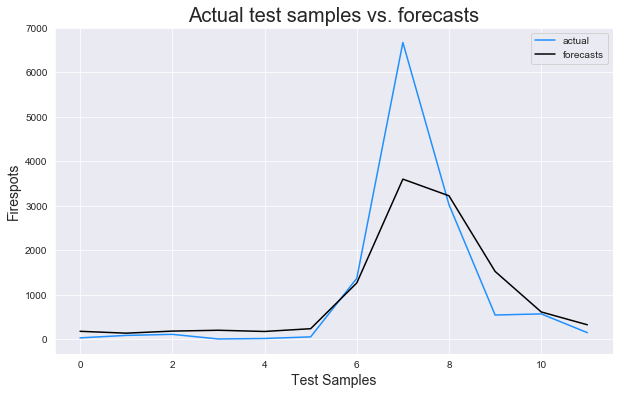

In [249]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='dodgerblue')
plt.plot(x, arima.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Amazonas in Brazil for the year 2019.

In [250]:
arima.predict(n_periods=test.shape[0])

array([ 182.47111643,  140.32613697,  186.67051829,  205.74927788,
        178.55800459,  240.69258153, 1267.0764539 , 3599.30763975,
       3224.76375832, 1527.03137011,  616.86545336,  328.52562103])

The predicted total of firespots for Amazonas in Brazil in 2019 was about 11698.

In [251]:
arima.predict(n_periods=test.shape[0]).sum()

11698.037932163254

The actual total of firespots for Amazonas in Brazil in 2019 was 12665.

In [252]:
test.sum()

12665

The actual total of firespots exceeded the predicted total of firespots for Amazonas in Brazil in 2019.

I got the values for Mean Absolute Error(MAE), Root Mean Squared Error(RMSE), and R2 for my Amazonas time series model. The values show my model did well at predicting firespots. My Amazonas model explains a lot of the variability of the data in comparison to its mean value.

In [253]:
report_metrics(test, arima.predict(n_periods=test.shape[0]))

MAE:
	 448.1891454048864
RMSE:
	 939.2024345603973
R2:
	 0.7527369992902428


#### State Time Series Combined

I produced a set of time series to involve all Brazilian states that include the Amazon to show fire outbreaks per year between 1999-2019.

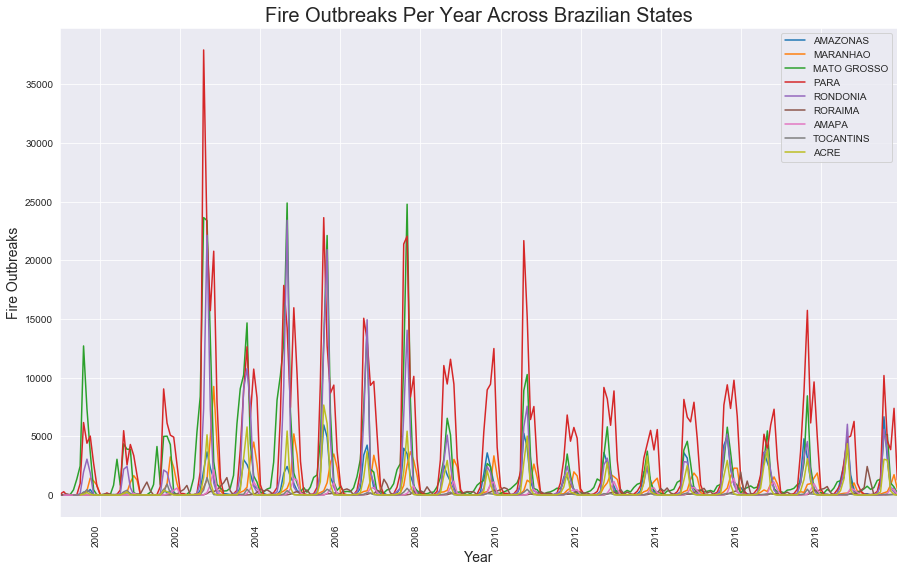

In [254]:
for state in firedf['state'].unique():
    #Calculates and Graphs Total Fire Outbreaks Per State Per Year
    firedf.loc[firedf['state']==state].set_index('date')['firespots'].plot(figsize=(15,10))
    plt.legend(firedf['state'].unique())
    plt.xticks(rotation= 90)
    plt.xlabel("Year", fontsize= 14)
    plt.ylabel("Fire Outbreaks", fontsize= 14)
    plt.title("Fire Outbreaks Per Year Across Brazilian States", fontsize= 20)

The group of time series graph above showed that most all of the Brazilian states follow similar seasonality trends.  The Brazilian states of Mato Grosso, Para, and Rondonia appear to lead the group of trends with their high firespot totals. Roraima was the only Brazilian state that seemed to have its own trend line and followed a different pattern than the other Brazilian states, but its trend was still a seasonal trend. 

#### Maranhao Time Series Exploration

I procured a Maranhao state time series in the next few cells.

In [255]:
Maranhaots=firedf.loc[firedf['state']=='MARANHAO']

In [256]:
Maranhaots=Maranhaots.set_index('date')['firespots']

I plotted my Maranhao time series to show fire outbreaks per year for the Brazilian state of Maranhao between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Maranhao')

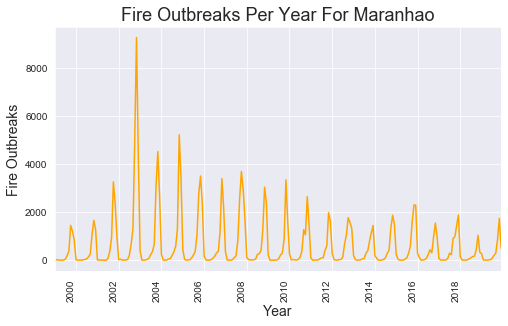

In [257]:
Maranhaots.plot(color='orange', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Maranhao", fontsize= 18)

Fire outbreaks are generally decreasing from the year 2003 to the year 2014. Then fire outbreaks vary.

I designed an arima model to predict firespots for the year 2019 for the state of Maranhao in Brazil.

In [258]:
Maranhaotsdf=pd.DataFrame(Maranhaots)

In [259]:
Maranhaotsdfar=Maranhaotsdf['firespots'].asfreq('MS', fill_value=0)

In [260]:
train, test = model_selection.train_test_split(Maranhaotsdfar, test_size=12)

In [261]:
arima1 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3853.530, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4064.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3832.502, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3864.607, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4130.268, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3930.193, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3817.782, Time=0.61 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3813.033, Time=0.36 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3832.513, Time=0.11 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=3815.026, Time=0.32 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3818.318, Time=0.32 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=3946.959, Time=0.21 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=3774.793, Time=0.37 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3807.960, Time=0.14 sec
 ARIMA(2,0,0)(2,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Maranhao below.

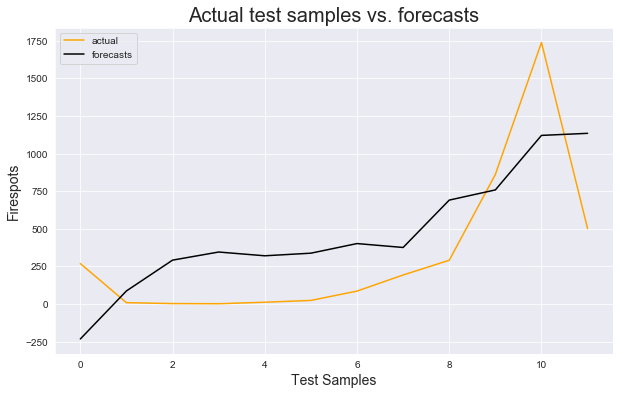

In [262]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='orange')
plt.plot(x, arima1.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Maranhao in Brazil for the year 2019.

In [263]:
arima1.predict(n_periods=test.shape[0])

array([-232.16702717,   86.98962133,  291.6503441 ,  345.55301838,
        320.60153124,  337.86049363,  401.79804111,  375.76489194,
        690.58754964,  758.26179739, 1120.48114991, 1134.26913981])

The predicted total of firespots for Maranhao in Brazil in 2019 was about 5864 (negative values get value of zero).

In [264]:
arima1.predict(n_periods=test.shape[0]).sum() + 232

5863.650551323263

The actual total of firespots for Maranhao in Brazil in 2019 was 3989.

In [265]:
test.sum()

3989

The predicted total of firespots exceeded the actual total of firespots for Maranhao in Brazil in 2019.

My Maranhao arima model had a pretty low R2 score. My Maranhao model explains little of the variability of the data in comparison to its mean value. 2019 was a year with a lower number of firespots for Maranhao than most other years between 1999-2019, which explains the difficulty in comprehending the variability for the Maranhao data.

In [266]:
report_metrics(test, arima1.predict(n_periods=test.shape[0]))

MAE:
	 340.4582259215768
RMSE:
	 380.5760844367967
R2:
	 0.39848285588975574


#### Mato Grosso Time Series Exploration

I procured a Mata Grosso state time series in the next few cells.

In [267]:
MatoGrossots=firedf.loc[firedf['state']=='MATO GROSSO']

In [268]:
MatoGrossots=MatoGrossots.set_index('date')['firespots']

I plotted my Mato Grosso time series to show fire outbreaks per year for the Brazilian state of Mato Grosso between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Mato Grosso')

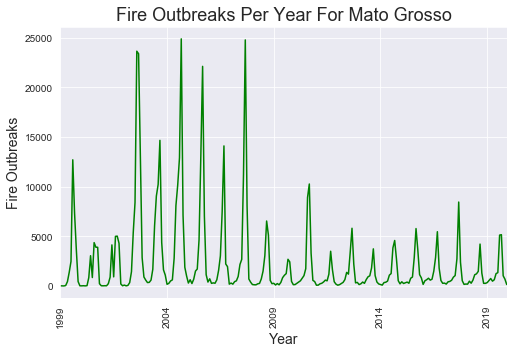

In [269]:
MatoGrossots.plot(color='green', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Mato Grosso", fontsize= 18)

Fire outbreaks may vary, but are generally decreasing.

I designed an arima model to predict firespots for the year 2019 for the state of Mato Grosso in Brazil.

In [270]:
MatoGrossotsdf=pd.DataFrame(MatoGrossots)

In [271]:
MatoGrossotsdfar=MatoGrossotsdf['firespots'].asfreq('MS', fill_value=0)

In [272]:
train, test = model_selection.train_test_split(MatoGrossotsdfar, test_size=12)

In [273]:
arima2 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4443.245, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4590.027, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4482.782, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4508.633, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4588.030, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4470.912, Time=0.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4448.605, Time=0.17 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=4445.042, Time=0.49 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=4444.471, Time=0.46 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=4547.754, Time=0.09 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=4470.673, Time=0.42 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4444.066, Time=0.41 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=4442.691, Time=0.56 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=4440.132, Time=0.48 sec
 ARIMA(1,1,2)(1,0,2

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Mato Grosso below.

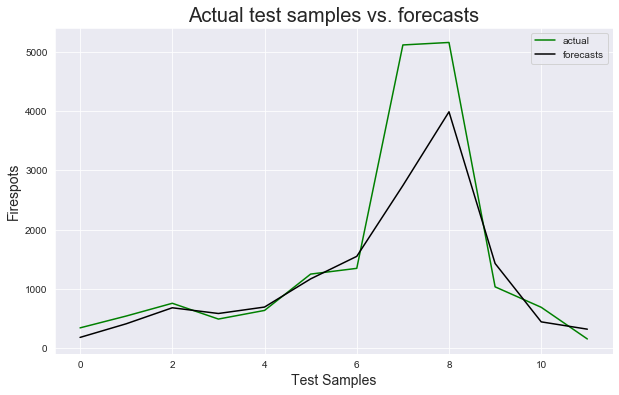

In [274]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='green')
plt.plot(x, arima2.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Mato Grosso in Brazil for the year 2019.

In [275]:
arima2.predict(n_periods=test.shape[0])

array([ 174.47199257,  404.90014812,  675.87270515,  579.04693963,
        688.05119713, 1164.72716915, 1545.92330672, 2744.05546835,
       3991.73354213, 1425.55033779,  437.5824358 ,  313.77294992])

The predicted total of firespots for Mato Grosso in Brazil in 2019 was about 14146.

In [276]:
arima2.predict(n_periods=test.shape[0]).sum()

14145.688192452673

The actual total of firespots for Mato Grosso in Brazil in 2019 was 17479.

In [277]:
test.sum()

17479

The actual total of firespots exceeded the predicted total of firespots for Mato Grosso in Brazil in 2019.

My Mato Grosso arima model had a pretty high R2 score. My Mato Grosso model explains a lot of the variability of the data in comparison to its mean value.

In [278]:
report_metrics(test, arima2.predict(n_periods=test.shape[0]))

MAE:
	 430.33343915988235
RMSE:
	 784.7266117996926
R2:
	 0.7824596432536743


#### Para Time Series Exploration

I procured a Para state time series in the next few cells.

In [279]:
Parats=firedf.loc[firedf['state']=='PARA']

In [280]:
Parats=Parats.set_index('date')['firespots']

I plotted my Para time series to show fire outbreaks per year for the Brazilian state of Para between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Para')

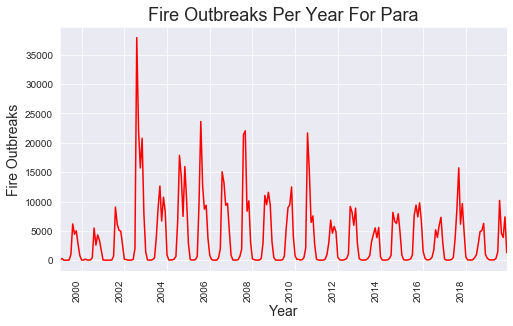

In [281]:
Parats.plot(color='red', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Para", fontsize= 18)

Fire outbreaks are generally decreasing until about the year 2014. Then fire outbreaks vary.

I designed an arima model to predict firespots for the year 2019 for the state of Para in Brazil.

In [282]:
Paratsdf=pd.DataFrame(Parats)

In [283]:
Paratsdfar=Paratsdf['firespots'].asfreq('MS', fill_value=0)

In [284]:
train, test = model_selection.train_test_split(Paratsdfar, test_size=12)

In [285]:
arima3 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=4628.094, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4817.617, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4638.409, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4683.871, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4909.855, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=4664.732, Time=0.19 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=4643.553, Time=0.29 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=4620.535, Time=0.45 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=4618.840, Time=0.45 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=4618.261, Time=0.36 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4641.127, Time=0.18 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=4616.910, Time=0.42 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=4624.868, Time=0.18 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=4618.322, Time=0.42 sec
 ARIMA(1,0,2)(1,0,2

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Para below.

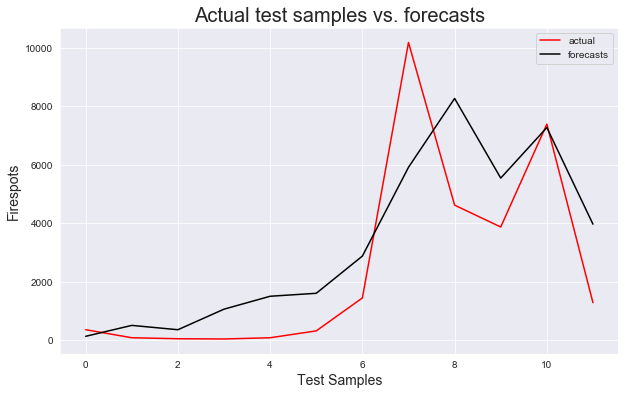

In [286]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='red')
plt.plot(x, arima3.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Para in Brazil for the year 2019.

In [287]:
arima3.predict(n_periods=test.shape[0])

array([ 129.28091029,  503.02788021,  354.68512124, 1058.43659119,
       1499.70502102, 1601.63879228, 2874.94828625, 5912.7763746 ,
       8269.47647566, 5543.86122322, 7272.91286827, 3966.76987079])

The predicted total of firespots for Para in Brazil in 2019 was about 38988.

In [288]:
arima3.predict(n_periods=test.shape[0]).sum()

38987.5194150151

The actual total of firespots for Para in Brazil in 2019 was 29700.

In [289]:
test.sum()

29700

The predicted total of firespots exceeded the actual total of firespots for Para in Brazil in 2019.

My Para arima model had a fairly high R2 score. My Para model explains a lot of the variability of the data in comparison to its mean value.

In [290]:
report_metrics(test, arima3.predict(n_periods=test.shape[0]))

MAE:
	 1543.1315923913846
RMSE:
	 2014.6832866470977
R2:
	 0.610664560966858


#### Rondonia Time Series Exploration

I procured a Rondonia state time series in the next few cells.

In [291]:
Rondoniats=firedf.loc[firedf['state']=='RONDONIA']

In [292]:
Rondoniats=Rondoniats.set_index('date')['firespots']

I plotted my Rondonia time series to show fire outbreaks per year for the Brazilian state of Rondonia between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Rondonia')

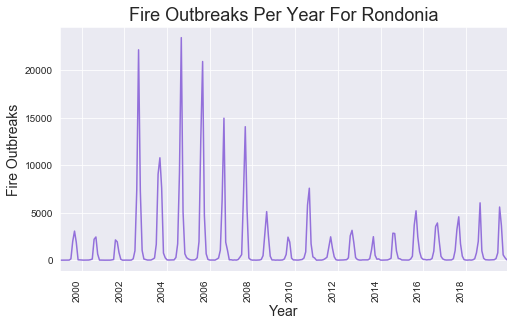

In [293]:
Rondoniats.plot(color='mediumpurple', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Rondonia", fontsize= 18)

Fire outbreaks are generally decreasing from the year 2005 until about the year 2012. Then fire outbreaks vary.

I designed an arima model to predict firespots for the year 2019 for the state of Rondonia in Brazil.

In [294]:
Rondoniatsdf=pd.DataFrame(Rondoniats)

In [295]:
Rondoniatsdfar=Rondoniatsdf['firespots'].asfreq('MS', fill_value=0)

In [296]:
train, test = model_selection.train_test_split(Rondoniatsdfar, test_size=12)

In [298]:
arima4 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=4371.957, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4575.771, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4386.099, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4429.831, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4611.768, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=4427.219, Time=0.16 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=4378.317, Time=0.25 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=4361.978, Time=0.45 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=4360.718, Time=0.44 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=4358.673, Time=0.35 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=4376.379, Time=0.19 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=4360.026, Time=0.38 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=4368.418, Time=0.18 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=4358.638, Time=0.28 sec
 ARIMA(0,0,2)(1,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Rondonia below.

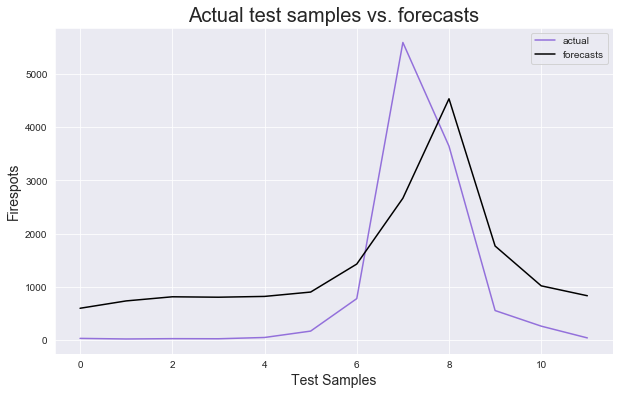

In [300]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='mediumpurple')
plt.plot(x, arima4.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Rondonia in Brazil for the year 2019.

In [301]:
arima4.predict(n_periods=test.shape[0])

array([ 598.86551907,  737.02971291,  814.43261997,  806.5403131 ,
        821.44272822,  903.24839436, 1429.32758192, 2665.73565767,
       4534.30761673, 1768.35451811, 1020.20067134,  834.17918957])

The predicted total of firespots for Rondonia in Brazil in 2019 was about 16934.

In [302]:
arima4.predict(n_periods=test.shape[0]).sum()

16933.66452297847

The actual total of firespots for Rondonia in Brazil in 2019 was 11206.

In [303]:
test.sum()

11206

The predicted total of firespots exceeded the actual total of firespots for Rondonia in Brazil in 2019.

My Rondonia arima model had a fairly high R2 score. My Rondonia model explains a lot of the variability of the data in comparison to its mean value.

In [304]:
report_metrics(test, arima4.predict(n_periods=test.shape[0]))

MAE:
	 965.016100636711
RMSE:
	 1141.6351204086523
R2:
	 0.5545128612361949


#### Roraima Time Series Exploration

I procured a Roraima state time series in the next few cells.

In [305]:
Roraimats=firedf.loc[firedf['state']=='RORAIMA']

In [306]:
Roraimats=Roraimats.set_index('date')['firespots']

I plotted my Roraima time series to show fire outbreaks per year for the Brazilian state of Roraima between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Roraima')

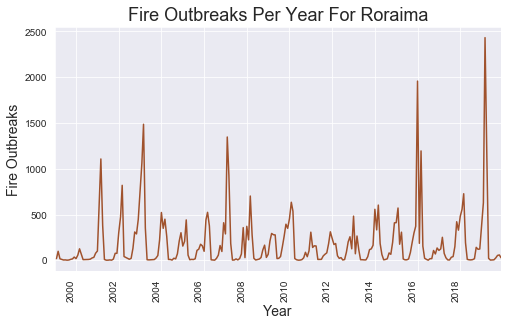

In [307]:
Roraimats.plot(color='sienna', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Roraima", fontsize= 18)

The year 2019 had the most fire outbreaks for any year between 1999-2019 for Roraima.

I designed an arima model to predict firespots for the year 2019 for the state of Roraima in Brazil.

In [308]:
Roraimatsdf=pd.DataFrame(Roraimats)

In [309]:
Roraimatsdfar=Roraimatsdf['firespots'].asfreq('MS', fill_value=0)

In [310]:
train, test = model_selection.train_test_split(Roraimatsdfar, test_size=12)

In [311]:
arima5 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3270.376, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3365.103, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3291.827, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3316.784, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3450.150, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3285.381, Time=0.16 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3275.831, Time=0.20 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3262.036, Time=0.45 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=3259.818, Time=0.43 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=3257.660, Time=0.34 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3273.713, Time=0.16 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=3259.421, Time=0.38 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=3267.543, Time=0.18 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=3259.748, Time=0.24 sec
 ARIMA(1,0,1)(2,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Roraima below.

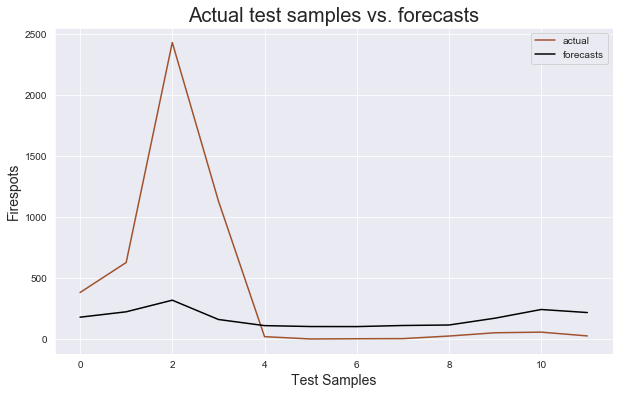

In [312]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='sienna')
plt.plot(x, arima5.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Roraima in Brazil for the year 2019.

In [313]:
arima5.predict(n_periods=test.shape[0])

array([180.5945615 , 224.79544049, 319.97099429, 161.82184063,
       111.44192219, 104.01332837, 103.53027155, 112.49968626,
       116.4947125 , 172.49486713, 243.68051141, 218.66961689])

The predicted total of firespots for Roraima in Brazil in 2019 was about 2070.

In [314]:
arima5.predict(n_periods=test.shape[0]).sum()

2070.007753209252

The actual total of firespots for Roraima in Brazil in 2019 was 4775.

In [315]:
test.sum()

4775

The actual total of firespots exceeded the predicted total of firespots for Roraima in Brazil in 2019.

My Roraima arima model had a tiny R2 score. My Roraima model explains almost none of the variability of the data in comparison to its mean value. 2019 was a very unusually high year for firespots for the Brazilian state of Roraima.

In [316]:
report_metrics(test, arima5.predict(n_periods=test.shape[0]))

MAE:
	 389.8868399488369
RMSE:
	 692.1044579483406
R2:
	 0.018389321478993637


#### Amapa Time Series Exploration

I procured an Amapa state time series in the next few cells.

In [317]:
Amapats=firedf.loc[firedf['state']=='AMAPA']

In [318]:
Amapats=Amapats.set_index('date')['firespots']

I plotted my Amapa time series to show fire outbreaks per year for the Brazilian state of Amapa between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Amapa')

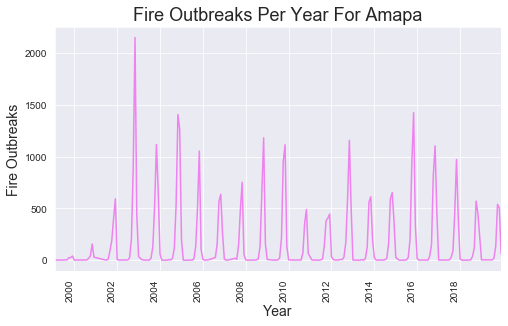

In [319]:
Amapats.plot(color='violet', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Amapa", fontsize= 18)

Fire outbreaks are generally decreasing from the year 2003 until the year 2012. Then fire outbreaks vary.

I designed an arima model to predict firespots for the year 2019 for the state of Amapa in Brazil.

In [320]:
Amapatsdf=pd.DataFrame(Amapats)

In [321]:
Amapatsdfar=Amapatsdf['firespots'].asfreq('MS', fill_value=0)

In [322]:
train, test = model_selection.train_test_split(Amapatsdfar, test_size=12)

In [323]:
arima6 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3231.916, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3442.737, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3252.862, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3274.856, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3492.994, Time=0.00 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3268.924, Time=0.14 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3237.396, Time=0.22 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3231.025, Time=0.48 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=3229.378, Time=0.44 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=3227.503, Time=0.36 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3235.412, Time=0.19 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=3228.251, Time=0.37 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=3228.082, Time=0.18 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=3228.056, Time=0.25 sec
 ARIMA(1,0,1)(2,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Amapa below.

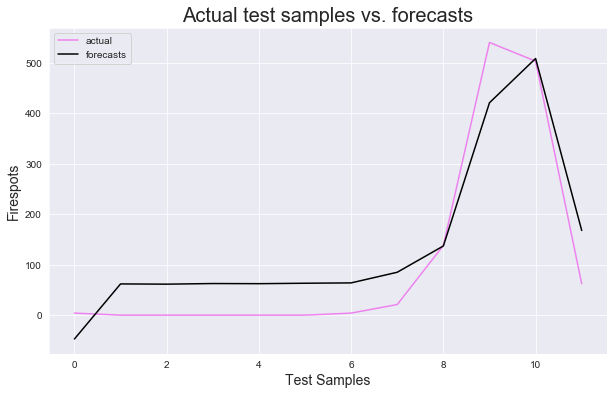

In [324]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='violet')
plt.plot(x, arima6.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Amapa in Brazil for the year 2019.

In [325]:
arima6.predict(n_periods=test.shape[0])

array([-47.23455404,  61.80849466,  61.32130664,  62.56152914,
        62.28734769,  63.14764914,  63.83443558,  84.91442708,
       136.95624012, 420.6177509 , 508.24815304, 167.68066646])

The predicted total of firespots for Amapa in Brazil in 2019 was about 1693 (negative values get value of zero).

In [326]:
arima6.predict(n_periods=test.shape[0]).sum() + 47

1693.1434464021102

The actual total of firespots for Amapa in Brazil in 2019 was 1272.

In [327]:
test.sum()

1272

The predicted total of firespots exceeded the actual total of firespots for Amapa in Brazil in 2019.

My Amapa arima model had a high R2 score. My Amapa model explains most of the variability of the data in comparison to its mean value.

In [328]:
report_metrics(test, arima6.predict(n_periods=test.shape[0]))

MAE:
	 59.78871437053429
RMSE:
	 67.76259247657073
R2:
	 0.872785977518136


#### Tocantins Time Series Exploration

I procured a Tocantins state time series in the next few cells.

In [329]:
Tocantinsts=firedf.loc[firedf['state']=='TOCANTINS']

In [330]:
Tocantinsts=Tocantinsts.set_index('date')['firespots']

I plotted my Tocantins time series to show fire outbreaks per year for the Brazilian state of Tocantins between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Tocantins')

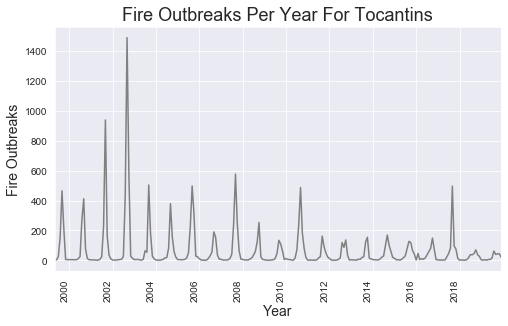

In [331]:
Tocantinsts.plot(color='gray', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Tocantins", fontsize= 18)

The year 2019 had some of the least fire outbreaks for any year between 1999-2019 for Tocantins.

I designed an arima model to predict firespots for the year 2019 for the state of Tocantins in Brazil.

In [332]:
Tocantinstsdf=pd.DataFrame(Tocantinsts)

In [333]:
Tocantinstsdfar=Tocantinstsdf['firespots'].asfreq('MS', fill_value=0)

In [334]:
train, test = model_selection.train_test_split(Tocantinstsdfar, test_size=12)

In [335]:
arima7 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2884.598, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3050.647, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2867.367, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2907.532, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3090.574, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2990.797, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2862.855, Time=0.50 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2899.267, Time=0.35 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2901.764, Time=0.12 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2966.873, Time=0.31 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2894.782, Time=0.58 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2888.580, Time=0.32 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=2889.062, Time=0.22 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=2891.575, Time=0.42 sec
 ARIMA(1,0,0)(2,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Tocantins below.

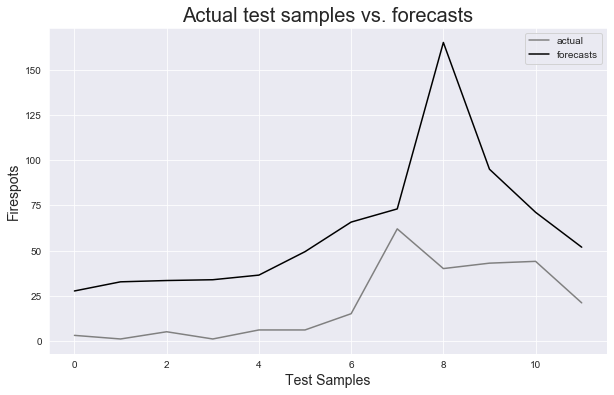

In [336]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='gray')
plt.plot(x, arima7.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Tocantins in Brazil for the year 2019.

In [337]:
arima7.predict(n_periods=test.shape[0])

array([ 27.59387452,  32.66127363,  33.37962467,  33.81639993,
        36.37940367,  49.36795495,  65.74994228,  73.0474528 ,
       165.25009372,  95.02884595,  71.16868654,  51.84171147])

The predicted total of firespots for Tocantins in Brazil in 2019 was about 735.

In [338]:
arima7.predict(n_periods=test.shape[0]).sum()

735.2852641334896

The actual total of firespots for Tocantins in Brazil in 2019 was 247.

In [339]:
test.sum()

247

The predicted total of firespots exceeded the actual total of firespots for Tocantins in Brazil in 2019.

My Tocantins arima model had a negative R2 score. My Tocantins model was not a good model because it does not capture the trend in the data and is worse than guessing the mean value as a prediction. However, the Tocantins firespots for the year 2019 did not follow much of any trend in comparison to past years in the dataset. Also, the Tocantins firespots totals in 2019 are generally smaller in number than the firespot totals for past years in the Tocantins data. The Tocantins firespots totals as a whole are significantly smaller in comparison to other Brazilian states as well. There is less developed data to investigate in 2019 in Tocantins, which could be why the Tocantins model was bad.

In [340]:
report_metrics(test, arima7.predict(n_periods=test.shape[0]))

MAE:
	 40.6904386777908
RMSE:
	 49.22299609377658
R2:
	 -4.9108218544141495


#### Acre Time Series Exploration

I procured an Acre state time series in the next few cells.

In [341]:
Acrets=firedf.loc[firedf['state']=='ACRE']

In [342]:
Acrets=Acrets.set_index('date')['firespots']

I plotted my Acre time series to show fire outbreaks per year for the Brazilian state of Acre between 1999-2019.

Text(0.5, 1.0, 'Fire Outbreaks Per Year For Acre')

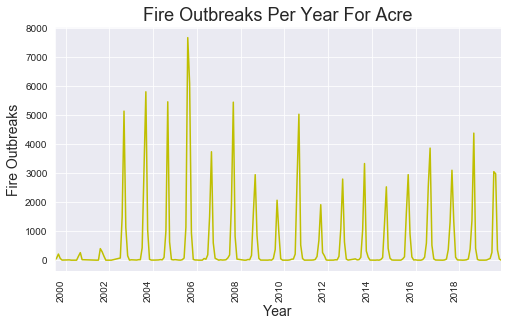

In [343]:
Acrets.plot(color='y', figsize=(8,5))
plt.xticks(rotation= 90)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Fire Outbreaks", fontsize= 14)
plt.title("Fire Outbreaks Per Year For Acre", fontsize= 18)

Fire outbreaks are generally decreasing from the year 2006 until about 2012. Then firespots generally start to increase.

I designed an arima model to predict firespots for the year 2019 for the state of Acre in Brazil.

In [344]:
Acretsdf=pd.DataFrame(Acrets)

In [345]:
Acretsdfar=Acretsdf['firespots'].asfreq('MS', fill_value=0)

In [346]:
train, test = model_selection.train_test_split(Acretsdfar, test_size=12)

In [347]:
arima8 = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=10,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=3823.731, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3993.549, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3841.891, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3872.582, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4029.489, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=3874.937, Time=0.15 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=3832.585, Time=0.23 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=3818.785, Time=0.43 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=3816.407, Time=0.40 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=3814.212, Time=0.40 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=3831.308, Time=0.20 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=3816.340, Time=0.38 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=3821.534, Time=0.16 sec
 ARIMA(0,0,2)(2,0,0)[12] intercept   : AIC=3816.890, Time=0.30 sec
 ARIMA(1,0,1)(2,0,0

I graphed my predicted values of firespots with the true values of firespots for 2019 for the Brazilian state of Acre below.

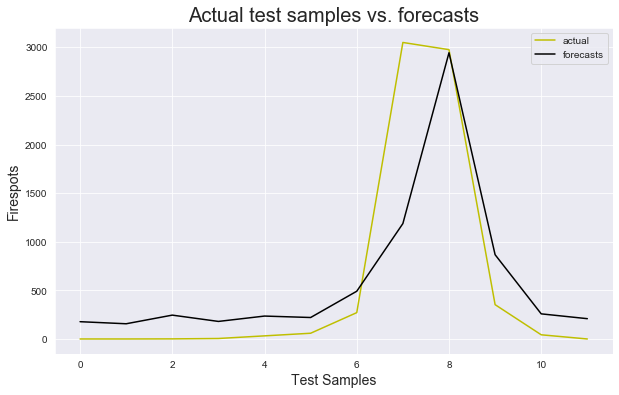

In [348]:
# Plot actual test vs. forecasts:
plt.figure(figsize=(10,6))
x = np.arange(test.shape[0])
plt.plot(x, test, color='y')
plt.plot(x, arima8.predict(n_periods=test.shape[0]), color= 'black')
plt.xlabel('Test Samples', fontsize= 14)
plt.ylabel('Firespots', fontsize=14)
plt.title('Actual test samples vs. forecasts', fontsize= 20)
plt.legend(labels= ['actual', 'forecasts'])
plt.show()

The cell below shows the predicted firespots by month for Acre in Brazil for the year 2019.

In [349]:
arima8.predict(n_periods=test.shape[0])

array([ 178.79459948,  157.46204247,  246.36709009,  181.53930747,
        236.65390724,  221.85537333,  492.09394758, 1188.02810039,
       2945.35193198,  867.79117684,  259.36675505,  209.79439198])

The predicted total of firespots for Acre in Brazil in 2019 was about 7185.

In [350]:
arima8.predict(n_periods=test.shape[0]).sum()

7185.098623907704

The actual total of firespots for Acre in Brazil in 2019 was 6802.

In [351]:
test.sum()

6802

The predicted total of firespots exceeded the actual total of firespots for Acre in Brazil in 2019.

My Acre arima model had a pretty high R2 score. My Acre model explains a lot of the variability of the data in comparison to its mean value.

In [352]:
report_metrics(test, arima8.predict(n_periods=test.shape[0]))

MAE:
	 347.6948799301911
RMSE:
	 583.6922166081316
R2:
	 0.7184615982047373


## Conclusions

My full analyses lead me to the following conclusions:

- Deforestation has not necessarily decreased over time. Acknowledge high deforestation totals and strong seasonality trends of firespots particularly within the Brazilian states of Mato Grosso, Para, and Rondonia to mitigate further and continuing deforestation issues identified within these states.


- Recognize future implications of an unprecedented high number of firespots for the months of March and April in 2019 and the states of Amazonas and Roraima in 2019. Prepare to provide forest evacuations if these firespot totals remain the same or increase in future years.


- Employ efforts to enforce stricter fire restrictions during strong firespot season to reduce deforestation.

## Recommendations for Further Analysis

- Integrate more features in future modeling such as annual soybean yields, annual timber production amounts, and number of cattle ranches in Brazil per year. Soybean production, the manufacturing of timber, and the formations of cattle ranches impact the quantities of Amazonian deforestation in Brazil.


- Incorporate and analyze satellite image classification information that show different activities relating to whether or not deforestation is occurring at given times. These images aid in determining when deforestation is happening.